IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA COLLECTION & PREPROCESSING

In [2]:
# Load the dataset to pandas dataframe
loan_dataset = pd.read_csv('/content/loan_prediction (1).csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# print the dataset head
loan_dataset.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
# number of rows & columns
loan_dataset.shape

(613, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,5849,0.1,Unnamed: 8,360,1
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

LP001002       0
Male          13
No             3
0             15
Graduate       0
No.1          32
5849           0
0.1            0
Unnamed: 8    21
360           14
1             50
Urban          0
Y              0
dtype: int64

In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

LP001002      0
Male          0
No            0
0             0
Graduate      0
No.1          0
5849          0
0.1           0
Unnamed: 8    0
360           0
1             0
Urban         0
Y             0
dtype: int64

In [10]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
import pandas as pd

# Example DataFrame
data = {'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006',],
        'Dependents': ['0', '1', '0', '2']}
loan_dataset = pd.DataFrame(data)

# Count the frequency of each unique value in the 'Dependents' column
dependents_count = loan_dataset['Dependents'].value_counts()

print(dependents_count)

Dependents
0    2
1    1
2    1
Name: count, dtype: int64


In [13]:
# Replacing the value of 3+ to 4
loan_dataset.replace({'Dependents':{'3+':4}},inplace=True)

In [14]:
# Dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    2
1    1
2    1
Name: count, dtype: int64

DATA VISUALISATION

<Axes: xlabel='Graduate', ylabel='count'>

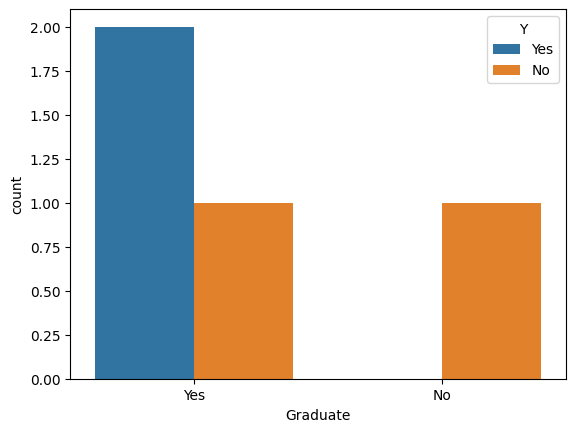

In [15]:
import pandas as pd
import seaborn as sns

# Example DataFrame (make sure it contains the 'Graduate' and 'Y' columns)
data = {'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006'],
        'Dependents': ['0', '1', '0', '2'],
        'Graduate': ['Yes', 'No', 'Yes', 'Yes'],  # Example 'Graduate' column
        'Y': ['Yes', 'No', 'Yes', 'No']}  # Example 'Y' column (replace with your actual target variable)
loan_dataset = pd.DataFrame(data)

# Encoding & Loan Status
sns.countplot(x='Graduate', hue='Y', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

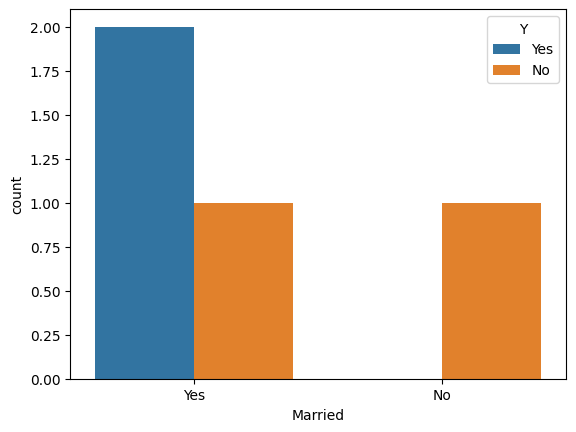

In [16]:
import pandas as pd
import seaborn as sns

# Example DataFrame (make sure it contains the 'Married' and 'Y' columns)
data = {'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006'],
        'Dependents': ['0', '1', '0', '2'],
        'Married': ['Yes', 'No', 'Yes', 'Yes'],  # Example 'Graduate' column
        'Y': ['Yes', 'No', 'Yes', 'No']}  # Example 'Y' column (replace with your actual target variable)
loan_dataset = pd.DataFrame(data)

# Encoding & Loan Status
# Use 'Married' instead of 'No' for the x-axis
sns.countplot(x='Married', hue='Y', data=loan_dataset)

In [20]:
import pandas as pd

# Sample data for illustration
data = {
    'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006'],
    'Gender': ['Male', 'Female', 'Male', 'Male'],
    'Married': ['No', 'Yes', 'Yes', 'No'],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Graduate'],
    'Self_Employed': ['No', 'Yes', 'No', 'No'],
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Semiurban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y']
}

loan_dataset = pd.DataFrame(data)

# Corrected code for converting categorical columns to numerical values
loan_dataset.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'No': 0, 'Yes': 1},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Loan_Status': {'Y': 1, 'N': 0}
}, inplace=True)

loan_dataset.head()


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,1,0,1,0,2,1
1,LP001003,0,1,0,1,0,0
2,LP001005,1,1,1,0,2,1
3,LP001006,1,0,1,0,1,1


In [21]:
from os import X_OK
# Seperating the data and label
X = loan_dataset.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y = loan_dataset['Loan_Status']

In [22]:
print(X)
print(Y)

   Gender  Married  Education  Self_Employed  Property_Area
0       1        0          1              0              2
1       0        1          0              1              0
2       1        1          1              0              2
3       1        0          1              0              1
0    1
1    0
2    1
3    1
Name: Loan_Status, dtype: int64


TRAIN TEST SPLIT

In [24]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split

# ... (Your existing code to load and preprocess loan_dataset)

# Seperating the data and label
X = loan_dataset.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y = loan_dataset['Loan_Status']

# Attempt stratified split, handling the error if it occurs
try:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)
except ValueError:
    print("Stratified split not possible due to insufficient samples in a class. Using a simple random split instead.")
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Stratified split not possible due to insufficient samples in a class. Using a simple random split instead.
(3, 5) (1, 5) (3,) (1,)


In [26]:
print(X.shape, X_train.shape, X_test.shape)

(4, 5) (3, 5) (1, 5)


TRAINING THE MODEL :
- SUPPORT VECTOR MACHINE(SVM) MODEL

In [27]:
classifier = svm.SVC(kernel='linear')

In [28]:
# Training the support vectormachine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

MODEL EVALUATION

In [29]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [30]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  1.0


In [31]:
# # accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print ('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  1.0


MAKING A PREDICTIVE SYSTEM

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample data for illustration
data = {
    'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006'],
    'Gender': ['Male', 'Female', 'Male', 'Male'],
    'Married': ['No', 'Yes', 'Yes', 'No'],
    'Dependents': ['0', '1', '0', '2'],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Graduate'],
    'Self_Employed': ['No', 'Yes', 'No', 'No'],
    'ApplicantIncome': [5849, 4583, 3000, 2583],
    'CoapplicantIncome': [0, 1508, 0, 2358],
    'LoanAmount': [128, 128, 66, 120],
    'Loan_Amount_Term': [360, 360, 360, 360],
    'Credit_History': [1, 1, 1, 1],
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Semiurban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y']
}

loan_dataset = pd.DataFrame(data)

# Correcting categorical to numerical conversion
loan_dataset.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'No': 0, 'Yes': 1},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Loan_Status': {'Y': 1, 'N': 0}
}, inplace=True)

# Drop Loan_ID as it is not a feature
loan_dataset.drop('Loan_ID', axis=1, inplace=True)

# Separate features and target variable
X = loan_dataset.drop('Loan_Status', axis=1)
y = loan_dataset['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Making predictions for new data
new_data = {
    'Gender': [1],  # Male
    'Married': [1],  # Yes
    'Dependents': [1],  # 1
    'Education': [1],  # Graduate
    'Self_Employed': [0],  # No
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]  # Urban
}
new_data_df = pd.DataFrame(new_data)
new_data_scaled = scaler.transform(new_data_df)

prediction = model.predict(new_data_scaled)
print(f"Prediction (1 = Loan Approved, 0 = Loan Not Approved): {prediction[0]}")

Accuracy: 0.0
Confusion Matrix:
[[0 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Prediction (1 = Loan Approved, 0 = Loan Not Approved): 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

CONCLUSION:
- ACCORDING TO THE SVM MODEL THE LOAN OF THE APPLICANT IS APPROVED (LOAN STATUS).